In [6]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('~/Scripts/bin/v.mplstyle')

import pytraj as pt

In [12]:
plt.rcParams['figure.dpi'] = 100

In [7]:

mgs = [1358, 1360]       # MgA, MgB

residues = [
    [1423, 1424, 1010, 1081, 1066],  # Key coordination distances near MgA (:1358)
    [1371, 1372, 434, 505, 490]      # Key coodination distances near MgB (:1360)
]    

labels = [
    ['DT', 'DG', 'E', 'E', 'H'],
    ['DG', 'DG', 'E', 'E', 'H']
]

In [8]:
# Load trajectory and topology files
# relativbe path tooooo
traj = pt.iterload('../1leader/4ntds/prod0?.nc', top='../1leader/4ntds/step3_pbcsetup_1264.parm7')
traj # Same as print(traj)

pytraj.TrajectoryIterator, 375 frames: 
Size: 4.907093 (GB)
<Topology: 585439 atoms, 187525 residues, 186013 mols, PBC with box type = orthorhombic>
           

[1.99445099 2.08743825 2.09410509 ... 2.12212112 2.04685287 2.12181367]


Text(0, 0.5, 'Minimum Distance (Å)')

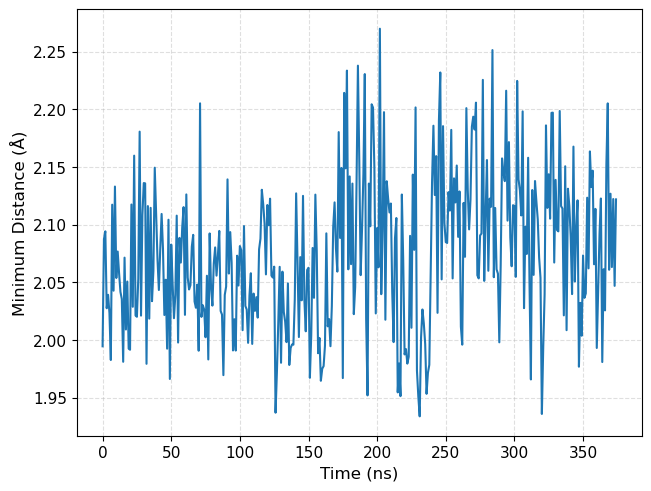

In [13]:
data = pt.mindist(traj, ':1358 :1010')
print(data)
plt.plot(data)
plt.xlabel('Time (ns)')
plt.ylabel('Minimum Distance (Å)')

0
1
2


IndexError: list index out of range

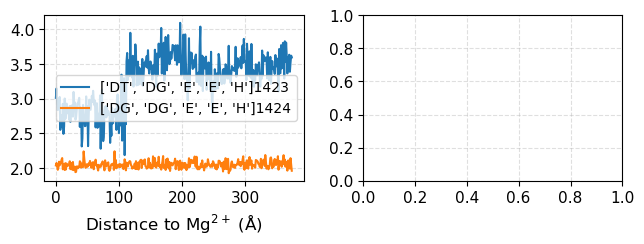

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(6.33,2.33))

for i in range(len(mgs)):
    mg = mgs[i]
    for j in range(len(residues[i])):
        print(j)
        data = pt.mindist(traj, f':{mg} :{residues[i][j]}')
        ax[i].plot(data, label=f'{labels[j]}{residues[i][j]}')
        ax[i].set_xlabel('Distance to Mg$^{2+}$ (Å)')
        ax[i].legend()

# Separate data analysis and plotting so your mistakes can be forgiven

In [ ]:

moredatas = []

for i in range(len(mgs)):
    mg = mgs[i]
    datas = []
    for j in range(len(residues[i])):
        data = pt.mindist(traj, f':{mg} :{residues[i][j]}')
        datas.append(data)
    moredatas.append(datas)    


In [ ]:

fig, ax = plt.subplots(1,2, figsize=(6.66,2.75))

for i,axs in enumerate(ax.flat):
    data = moredatas[i]
    for j in range(len(data)):
        axs.plot(data[j], label=f'{labels[i][j]}{residues[i][j]}')
    axs.set_xlabel('Time (ns)')
    axs.set_ylabel('Distance to Mg$^{2+}$ (Å)')
    axs.set_ylim(0,6)
    axs.legend()